# Naive Bayes with Labeled Text Data

### =================================================================================================================
### About the Gaussian Naive Bayes
    
    In this section, we are going to classify the data sets using Naive Bayes classifier. The purpose of classification is separating and organizing data into relevant groups (“classes”) based on their shared characteristics. In data science, a classifier is a type of machine learning algorithm used to assign a class label to a data input. An example is an image recognition classifier to label an image (e.g., “car,” “truck,” or “person”). Classifier algorithms are trained using labeled data; in the image recognition example, for instance, the classifier receives training data that labels images. After sufficient training, the classifier then can receive unlabeled images as inputs and will output classification labels for each image. 

    There are many algorithms for data classification, naive Bayes classifier belongs to a family of simple "probabilistic classifiers" based on applying Bayes' theorem with strong (naive) independence assumptions between the features. Before we dive into the algorithm itself, I want to review the Bayes theorem a bit with you. Bayes’ Theorem is a simple mathematical formula used for calculating conditional probabilities which is a measure of the probability of an event occurring given that another event has occurred. Applying Bayes’ Theorem to the classification of the data, the output will be the likelihood of an outcome to happen given specific features (input).

### =================================================================================================================

In [126]:
#LOAD RELEVANT PACKAGES
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as  pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix



### 1. Read in the Data

Before applying classification on the data using Naive Bayes, it is very essential to prepare our text data in the form of a matrix where each row represents a tweet and each column represents a word. The value in the matrix will then be the number of occurrences of the corresponding word. This process of converting each text to a long vector is called vectorization, and we have performed this in the data cleaning step and created a vectorized csv file [here](https://github.com/anly501/anly-501-project-liumingqian0511/tree/main/data/01-modified-data). Also in the data cleaning step, I created another word frequency dataframe which returns the frequency of all words in the texts in a desecending order. The purpose of creating the word frequency data frame is subsetting the vectorized text data by the top referenced words. The threshold I chose for 'top referenced' is 170, which is smaller than the total rows of texts.
 
I gathered my text data from twitter API, and the search words I used were five popular health insurance company: Aetna, Anthem, Cigna, Humana and UnitedHealth. Before merging these five seperate text datasets into one big dataset, I manually assign them with labels to differentiate their belonging group. The labels that represent their topic of tweets would be the target of prediction. In other words, we are going to classify the data and train a model to predict the likelihood of a text belonging to a specific topic.


In [136]:
df0 = pd.read_csv('/Users/liumingqian/anly-501-project-liumingqian0511/data/01-modified-data/vec.csv')
wf = pd.read_csv('/Users/liumingqian/anly-501-project-liumingqian0511/data/01-modified-data/word_frequency_text.csv')
df = df0[wf['word'][:170]]
df.head(10)


,co,cigna,aetna,anthem,unitedhealth,health,get,group,amp,plan,...,urban,annual,award,social,and,part,arthritisstl,going,online,even
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1,1,1,0,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
8,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [128]:
conditions = [
    (df0['label'] == 'Aetna'),
    (df0['label'] == 'Anthem'),
    (df0['label'] == 'Cigna'),
    (df0['label'] == 'Humana'),
    (df0['label'] == 'UnitedHealth')
    ]

# create a list of the values we want to assign for each condition
values = [1,2,3,4,5]

label = np.select(conditions, values)


In [129]:
u = np.mean(df,axis=0)
sd =np.std(df, axis = 0) 
for i in range(100):
    df.iloc[:,i] = (df.iloc[:,i] - u[i])/sd[i]


/var/folders/0y/czdjt9k17_9fgxmg3d286zjm0000gn/T/ipykernel_68462/602878240.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.iloc[:,i] = (df.iloc[:,i] - u[i])/sd[i]


### --------------------------------------------------------------------------------------------------
### 2. Partition the Data into Train and Test

Separating data into training and testing sets is an important part of evaluating data mining models. Typically, when you separate a data set into a training set and testing set, most of the data is used for training, and a smaller portion of the data is used for testing. The purpose of spliting the data into two sets is for validating the model that we train. After a model has been processed by using the training set, we test the model by making predictions against the test set. Because the data in the testing set already contains known values for the attribute that you want to predict, it is easy to determine whether the model's guesses are correct. If the model we fitted using training data can precisely predict the result of testing, then we can validate that the model is good. Using the **sklearn.model_selection** package, I splited the data into x_train, x_test, y_train and y_test with the ratio 0.2 between the train and test. I am going to use x_train and y_train to train the model and apply it on x_test and y_test for validation.

In [130]:
X = df.to_numpy()
Y = label

In [131]:
#INSERT CODE TO PARTITION DATASET INTO TRAINING-TEST
test_ratio=0.2
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=test_ratio, random_state=0)
#y_train=y_train.flatten()
#y_test=y_test.flatten()


print("x_train.shape		:",x_train.shape)
print("y_train.shape		:",y_train.shape)

print("X_test.shape		:",x_test.shape)
print("y_test.shape		:",y_test.shape)

x_train.shape		: (215, 170)
y_train.shape		: (215,)
X_test.shape		: (54, 170)
y_test.shape		: (54,)


### --------------------------------------------------------------------------------------------------
### 3. Training using Gaussian Naive Bayes.

Still using the sklearn package, the outcome is printed below. The accuracy of 96% in the training set is considered very high, only 7 texts were mislabeled out of the total 215 texts in the training set. However, high accuracy in the training set is not enough to validate the model since the model itself is trained using this set. We can see from the result that the accuracy of testing set drops to 65%. It is not a bad outcome considered we have 5 classes as the target. This number means that when we use the Gaussian Naive Bayes model that we trained from the training sets to predict the the outcome on testing set, the likelihood of the prediction to be accurate is 65%. 

To interpret the confusion matrix that generated by using the sklearn package, we just need to focus on the diagonal of the matrix which represents the accurate cases when we successfully predicted the outcome. The more yellowish, the higher accuracy the prediction is. As shown in the confusion matrix plots below, we can see that the diagonal of confusion matrix in the training set is a lot brighter than in the testing set. But overall in both matrices the diagonal is brighter than the other squares which means that there are a lot more accurate cases than the inaccurate ones. 

In [132]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
model = clf.fit(x_train, y_train)

#INSERT CODE TO PRINT THE ACCURACY AND NUMBER OF MISLABELED POINTS  FOR BOTH TRAINING AND TEST
print('ACCURACY CALCULATION')
print('TRAINING SET:')
print('Accuracy:', model.score(x_train,y_train))
print('Number of mislabeled points out of a total 215 points = ',(y_train !=model.predict(x_train)).sum())
print(' ')
print('TEST SET:')
print('Accuracy:', model.score(x_test,y_test))
print('Number of mislabeled points out of a total 54 points = ',(y_test !=model.predict(x_test)).sum())
print(' ')
print('CHECK FIRST 20 PREDICTIONS')
print('TRAINING SET:')
print(y_train[0:20])
print(model.predict(x_train)[0:20])
print('ERROR', model.predict(x_train)[0:20]-y_train[0:20])
print(' ')
print('TEST SET:')
print(y_test[0:20])
print(model.predict(x_test)[0:20])
print('ERROR', model.predict(x_test)[0:20]-y_test[0:20])

ACCURACY CALCULATION
TRAINING SET:
Accuracy: 0.9674418604651163
Number of mislabeled points out of a total 215 points =  7
 
TEST SET:
Accuracy: 0.6481481481481481
Number of mislabeled points out of a total 54 points =  19
 
CHECK FIRST 20 PREDICTIONS
TRAINING SET:
[5 1 5 5 3 2 2 1 3 2 1 3 2 2 2 3 1 3 3 5]
[5 1 5 5 3 2 2 1 3 2 1 2 2 2 2 3 1 3 3 5]
ERROR [ 0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0]
 
TEST SET:
[5 5 2 3 3 2 3 3 1 1 2 5 2 3 3 5 3 3 2 1]
[1 5 2 1 3 2 5 3 1 5 2 5 1 1 3 5 3 1 2 1]
ERROR [-4  0  0 -2  0  0  2  0  0  4  0  0 -1 -2  0  0  0 -2  0  0]


/Users/liumingqian/opt/anaconda3/envs/ANLY501/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


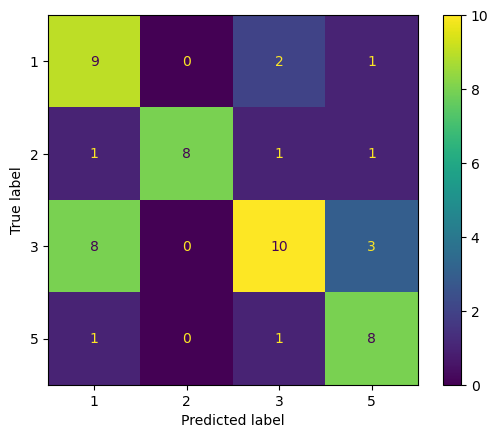

In [133]:
plot_confusion_matrix(clf, x_test, y_test)

/Users/liumingqian/opt/anaconda3/envs/ANLY501/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


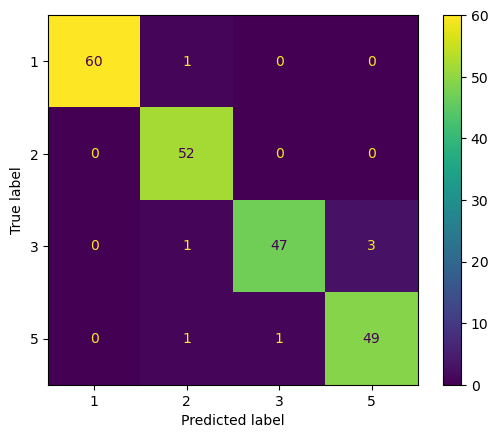

In [134]:
plot_confusion_matrix(clf, x_train, y_train)